In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

In [2]:
df= pd.read_csv('credit_card.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [3]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [4]:
kmeans = KMeans(n_clusters = 3, n_init = 'auto', random_state = 42)
kmeans.fit(scaled_df)

KMeans(n_clusters=3, random_state=42)

In [5]:
cluster_centers = kmeans.cluster_centers_

distances = cdist(scaled_df, cluster_centers, 'euclidean')

print(distances)

[[3.76361921 4.39679647 2.72323458]
 [2.48147889 3.68325734 2.96414958]
 [7.16964527 7.345224   6.46705846]
 ...
 [7.47367417 6.41045565 7.18143211]
 [6.21011105 6.26275806 6.66879175]
 [4.49490348 3.67983951 5.18530789]]


In [6]:
pca = PCA()
pca_df = pca.fit_transform(scaled_df)

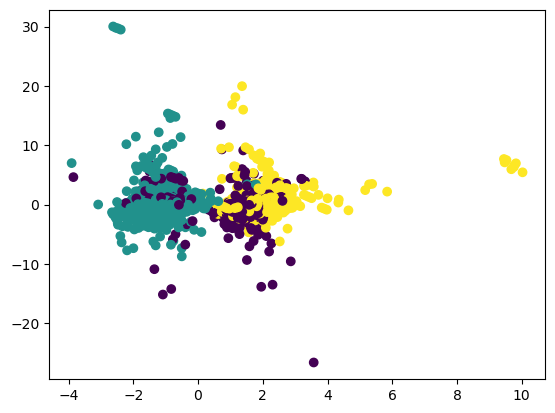

In [7]:
plt.scatter(pca_df[:,0], pca_df[:,1], c=kmeans.labels_)

In [8]:
# Instantiate the model 
iso = IsolationForest(contamination=0.0004, random_state = 42)

iso.fit(pca_df)

IsolationForest(contamination=0.0004, random_state=42)

In [9]:
predictions = iso.predict(pca_df)
predictions[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
# Change the labels to match our columns from the kmeans dataframe
# Not anamolies
predictions[predictions ==1] = 0
# Anomalies
predictions[predictions ==-1] = 1

predictions[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
# Isolation Forest
df['anomaly-iso_05'] = predictions

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,anomaly-iso_05
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
min_distances = np.min(distances, axis=1)

min_distances[:5]

array([2.72323458, 2.48147889, 6.46705846, 4.84083756, 3.04422311])

In [13]:
threshold = np.percentile(min_distances, 95)
threshold

7.460290952265529

In [14]:
filter_anomalies = min_distances > threshold

filter_anomalies.sum()

500

In [15]:
# Getting the row indices of the anomalies
idx_anomalies = df[filter_anomalies].index
idx_anomalies

Int64Index([  18,   49,   67,   80,   81,   83,   87,  127,  135,  141,
            ...
            9903, 9904, 9905, 9919, 9922, 9934, 9965, 9989, 9990, 9992],
           dtype='int64', length=500)

In [16]:
# Slicing the anomalies from X (for demonstration)
df.iloc[idx_anomalies]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,anomaly-iso_05
18,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,0.345173,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
49,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,-0.230873,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
67,-1.923213,-0.870482,2.320170,1.988776,0.417091,-0.380014,0.472139,-0.557333,-0.649079,1.410889,...,-0.686488,-0.779268,1.086055,0.518863,-0.363712,3.065576,-0.589022,-0.396110,35.00,0
80,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,6.051521,...,-0.852309,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0
81,-1.198968,-1.474100,1.840326,-4.515824,0.327567,-0.174469,0.959726,-1.026456,1.700435,-0.078942,...,-0.453169,0.334614,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934,-2.805263,2.561799,2.061543,1.395401,-0.707795,2.797493,-1.996641,-7.114781,2.457294,0.470039,...,6.311518,-2.744492,0.884675,0.068175,0.003160,-0.452196,0.307005,-0.225126,46.10,0
9965,-1.927400,-1.555059,1.522662,2.299607,-2.563695,2.381365,3.190753,-0.194062,1.597643,-1.401749,...,-0.060644,-0.652645,1.926562,-0.064068,0.275318,-0.466918,-0.043661,0.019481,877.77,0
9989,-3.544583,-2.017945,0.533444,-0.257317,-3.258624,2.628180,2.337337,-1.192511,1.896110,1.731256,...,-0.673491,1.488596,0.212412,-0.178197,-0.065951,-0.041249,-0.842003,0.510324,660.32,0
9990,-4.641893,2.902086,-1.572939,2.507299,-0.871783,-1.040903,-1.593901,-3.254905,1.908963,1.077418,...,1.963597,-0.217414,-0.549340,0.645545,-0.354558,-0.611764,-3.908080,-0.671248,11.39,0


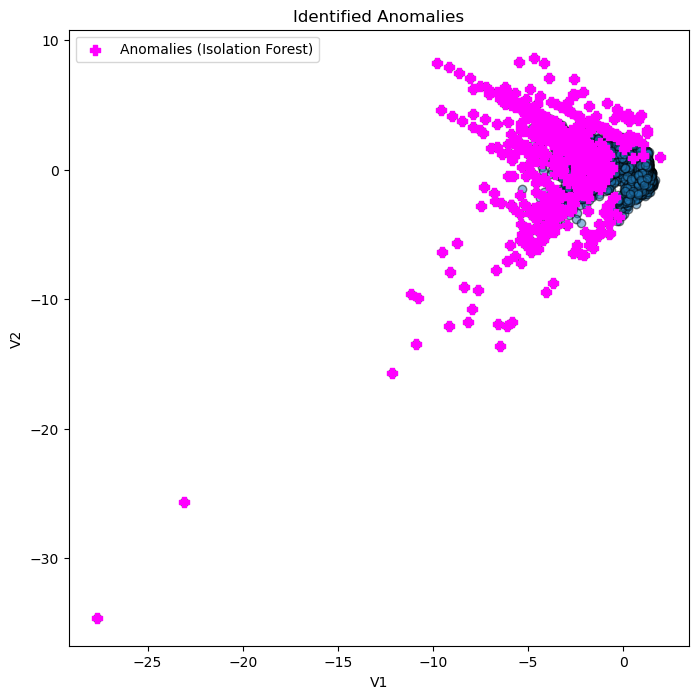

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(df['V1'], df['V2'], ec= 'black', alpha = 0.5)
ax.set_title("Identified Anomalies")  
    
# Plot the anomalies
df.loc[filter_anomalies].plot(
    x="V1", y="V2", kind="scatter", color="magenta", label="Anomalies (Isolation Forest)", 
    ax=ax, marker='P', s=50);